# Chapter 10 - Simple Linear Regression

## By Dylan Moore

## What does a Simple Linear Regression Model do?
#### A Simple Linear Regression Model only uses one independent variable to predict what the value of the dependent variable is

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = sns.load_dataset('diamonds')

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
- The r-value is used to identify correlations between each pair of numerical values within a DataFrame
- The range of the r-value is between 1.0 and -1.0
- When the r-value is at or close to 1.0 that indicates a strong positive correlation
- When the r-value is at or close to -1.0 that indicates a strong negative correlation
- When the r-value is at 0 (zero) that indicates that there is no correlation

In [7]:
data.corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

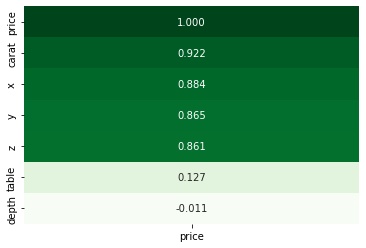

In [10]:
sns.heatmap(data = data.corr()[['price']].sort_values(by ='price' , ascending = False), annot = True, cmap = 'Greens', cbar = False, fmt = f'.3f')

## Procedure for Creating and Using a Regression Model
1. Split Dataset
2. Create model from training dataset
3. Validate model with test dataset
4. If model is valid, predict data with it

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']],
    test_size = 0.3, random_state = 20)

In [22]:
Model = LinearRegression()
Model

LinearRegression()

In [23]:
Model.fit(x_train, y_train)

LinearRegression()

In [24]:
Model.score(x_test, y_test)

0.8504107786474794

In [25]:
y_predicted = Model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [26]:
predicted = pd.DataFrame(y_predicted, columns = ['price_predicted'])
predicted.head(3)

,price_predicted
0,9540.641914
1,1940.075433
2,3180.984246


In [27]:
combined = predicted.join([x_test.reset_index(drop = True),
                           y_test.reset_index(drop = True)])
combined.head()

,price_predicted,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [28]:
melted = pd.melt(combined, id_vars = ['carat'],
                 value_vars = ['price','price_predicted'],
                 var_name = 'price_type', value_name = 'price_value')
melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,price_predicted,156.269013
32360,1.01,price_predicted,5585.245072
32361,1.53,price_predicted,9618.198715
32362,0.23,price_predicted,-464.185393


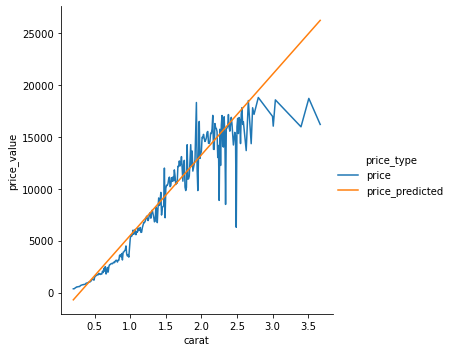

In [39]:
sns.relplot(data = melted, kind = 'line', x = 'carat', y = 'price_value', hue = 'price_type', ci = None)

## Regression line equation is y = mx + b, where...
- y is the **dependent** variable
- m is the **slope** of the line
- x is the **independent** variable
- b is the **Y-intercept**

In [40]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [41]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [42]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope of {m} and the y-intercept is {b}')

The slope of [7756.42561797] and the y-intercept is -2256.3605800454575


In [43]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800454575


In [57]:
import numpy as np
EstimateOne = 7756.42561797 * 0.70 + -2256.3605800454575
print(f'The predicted price for a 0.70 carat diamond is ${EstimateOne:,.2f}')

The predicted price for a 0.70 carat diamond is $3,173.14


In [59]:
EstimateTwo = 7756.42561797 * 0.54 + -2256.3605800454575
print(f'The predicted price for a 0.54 carat diamond is ${EstimateTwo:,.2f}')

The predicted price for a 0.54 carat diamond is $1,932.11


The predicted estimates in the previous two cells are similar to the graphed data, but the estimates appear to come out a bit higher than the actual price. It's about on target for just the predicted price though